In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np

In [2]:
VISPUBDATA_PLUS = pd.read_csv('../data/processed/vispubdata_plus.csv')
OPENALEX_CONCEPT_DF = pd.read_csv('../data/processed/openalex_concept_df.csv')
REF_DF = pd.read_csv('../data/processed/large/openalex_reference_concept_df.csv')
CIT_DF = pd.read_csv('../data/processed/large/openalex_citation_concept_df.csv')
REF_ID_NAME = 'Reference OpenAlex ID'
CIT_ID_NAME = 'Citation Paper OpenAlex ID'

REF_DF = REF_DF[REF_DF[REF_ID_NAME].notnull()]
CIT_DF = CIT_DF[CIT_DF[CIT_ID_NAME].notnull()]

In [3]:
ref_unique = pd.read_csv('../data/processed/openalex_reference_concept_df_unique.csv')
ref_unique.head()

,Reference,Reference OpenAlex Year,Reference OpenAlex ID,Reference OpenAlex Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
0,https://openalex.org/W2888685797,2018,W2888685797,DeepTracker: Visualizing the Training Process ...,13,1,Computer science,https://openalex.org/C41008148,https://www.wikidata.org/wiki/Q21198,0,0.900810
1,https://openalex.org/W2888685797,2018,W2888685797,DeepTracker: Visualizing the Training Process ...,13,2,Convolutional neural network,https://openalex.org/C81363708,https://www.wikidata.org/wiki/Q17084460,2,0.765918
2,https://openalex.org/W2888685797,2018,W2888685797,DeepTracker: Visualizing the Training Process ...,13,3,Process (computing),https://openalex.org/C98045186,https://www.wikidata.org/wiki/Q205663,2,0.669036
3,https://openalex.org/W2888685797,2018,W2888685797,DeepTracker: Visualizing the Training Process ...,13,4,Artificial intelligence,https://openalex.org/C154945302,https://www.wikidata.org/wiki/Q11660,1,0.602289
4,https://openalex.org/W2888685797,2018,W2888685797,DeepTracker: Visualizing the Training Process ...,13,5,Training (meteorology),https://openalex.org/C2777211547,https://www.wikidata.org/wiki/Q17141490,2,0.533716


In [4]:
cit_unique = CIT_DF.iloc[:, 4:].drop_duplicates()
cit_unique

,Citation Paper Year,Citation Paper OpenAlex ID,Citation Ppaer OpenAlex Title,Citation Paper OpenAlex DOI,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
0,2022.0,W4281736408,DramatVis Personae: Visual Text Analytics for ...,https://doi.org/10.1145/3532106.3533526,8.0,1.0,Analytics,https://openalex.org/C79158427,https://www.wikidata.org/wiki/Q485396,2.0,0.704162
1,2022.0,W4281736408,DramatVis Personae: Visual Text Analytics for ...,https://doi.org/10.1145/3532106.3533526,8.0,2.0,Computer science,https://openalex.org/C41008148,https://www.wikidata.org/wiki/Q21198,0.0,0.703784
2,2022.0,W4281736408,DramatVis Personae: Visual Text Analytics for ...,https://doi.org/10.1145/3532106.3533526,8.0,3.0,Visual analytics,https://openalex.org/C59732488,https://www.wikidata.org/wiki/Q2528440,3.0,0.638154
3,2022.0,W4281736408,DramatVis Personae: Visual Text Analytics for ...,https://doi.org/10.1145/3532106.3533526,8.0,4.0,Data science,https://openalex.org/C2522767166,https://www.wikidata.org/wiki/Q2374463,1.0,0.608217
4,2022.0,W4281736408,DramatVis Personae: Visual Text Analytics for ...,https://doi.org/10.1145/3532106.3533526,8.0,5.0,Cultural analytics,https://openalex.org/C545860419,https://www.wikidata.org/wiki/Q5193251,5.0,0.428023
...,...,...,...,...,...,...,...,...,...,...,...
1578279,2021.0,W3153872560,Randomized Algorithms for Scientific Computing...,NaN,7.0,3.0,Robustness (evolution),https://openalex.org/C63479239,https://www.wikidata.org/wiki/Q7353546,3.0,0.458825
1578280,2021.0,W3153872560,Randomized Algorithms for Scientific Computing...,NaN,7.0,4.0,Randomized algorithm,https://openalex.org/C128669082,https://www.wikidata.org/wiki/Q583461,2.0,0.424658
1578281,2021.0,W3153872560,Randomized Algorithms for Scientific Computing...,NaN,7.0,5.0,Data science,https://openalex.org/C2522767166,https://www.wikidata.org/wiki/Q2374463,1.0,0.403737
1578282,2021.0,W3153872560,Randomized Algorithms for Scientific Computing...,NaN,7.0,6.0,Artificial intelligence,https://openalex.org/C154945302,https://www.wikidata.org/wiki/Q11660,1.0,0.385798


### How many VIS, REF, and CIT papers have L0 Concept

In [5]:
vis = OPENALEX_CONCEPT_DF.copy()
# total paper number:
len(list(set(vis.DOI)))

3240

In [6]:
# number of VIS papers that have at least one L0 concept
vis_l0_dois = vis[vis.Level == 0].DOI.tolist()
len(list(set(vis_l0_dois)))

3238

In [7]:
len(list(set(vis_l0_dois))) / len(list(set(vis.DOI)))

0.9993827160493827

In [8]:
# how many VIS papers have multiple L0 Concepts
vis_multiple_l0 = list(set(
    [x for x in vis_l0_dois if vis_l0_dois.count(x) > 1]))
len(vis_multiple_l0)

270

In [9]:
len(vis_multiple_l0) / len(list(set(vis.DOI)))

0.08333333333333333

In [10]:
# Total number of unique ref papers
ref_ids = ref_unique['Reference OpenAlex ID'].tolist()
len(list(set(ref_ids)))

39817

In [11]:
# how many ref papers have at least one L0 concept
ref_l0_ids = ref_unique[ref_unique.Level == 0]['Reference OpenAlex ID'].tolist()
len(list(set(ref_l0_ids)))

39650

In [12]:
len(list(set(ref_l0_ids))) / len(list(set(ref_ids)))

0.9958058115880152

In [13]:
dic = dict(Counter(ref_l0_ids))
# dff = pd.DataFrame(dic.items(), columns = ['id', 'count'])
ref_multiple = []
for key,value in dic.items():
    if value > 1:
        ref_multiple.append(key)

In [14]:
# How many Ref papers have more than one L0 Concept
len(ref_multiple)

7795

In [15]:
len(ref_multiple) / len(list(set(ref_ids)))

0.19577065072707636

In [16]:
# Total number of unique cit papers
cit_ids = cit_unique['Citation Paper OpenAlex ID'].tolist()
len(list(set(cit_ids)))

60272

In [17]:
# how many cit papers have at least one L0 concept
cit_l0_ids = cit_unique[cit_unique.Level == 0]['Citation Paper OpenAlex ID'].tolist()
len(list(set(cit_l0_ids)))

60128

In [18]:
len(list(set(cit_l0_ids))) / len(list(set(cit_ids)))

0.9976108308999203

In [19]:
dic = dict(Counter(cit_l0_ids))
cit_multiple = []
for key,value in dic.items():
    if value > 1:
        cit_multiple.append(key)

In [20]:
# How many cit papers have more than one L0 Concept
len(cit_multiple)

9201

In [21]:
len(cit_multiple) / len(list(set(cit_ids)))

0.1526579506238386

#### Automation

In [22]:
vis_key = 'DOI'
ref_key = 'Reference OpenAlex ID'
cit_key = 'Citation Paper OpenAlex ID'

In [23]:
keys = [vis_key, ref_key, cit_key]

In [24]:
df_name_lists = ['vis', 'ref', 'cit']

In [25]:
vis_df = vis
ref_df = ref_unique
cit_df = cit_unique

In [26]:
dfs = [vis_df, ref_df, cit_df]

In [27]:
for idx, df in enumerate(dfs):
    key = keys[idx]
    df_name = df_name_lists[idx]
    unique_ids = list(set(df[key]))
    total = len(unique_ids)
    print(f'There are a total of {total} unique papers in {df_name}')
    for LEVEL in range(0, 4):
#         if df_name == 'vis':
        Level_concepts = df[df.Level == LEVEL].Concept
        unique_Level_concepts = list(set(Level_concepts))
        print(f'In {df_name}, there are {len(unique_Level_concepts)} unique L{LEVEL} concepts')
        level_ids = df[df.Level == LEVEL][key].tolist()
        unique_level_ids = list(set(level_ids))
        sub_total = len(unique_level_ids)
        ratio = round(sub_total / total, 3) * 100
        dic = dict(Counter(level_ids))
        id_multiple = []
        for id,value in dic.items():
            if value > 1:
                id_multiple.append(id)
        ratio_multiple = round(len(id_multiple) / total, 3) * 100
        print(f'In {df_name}, {sub_total} ({ratio}%) papers have at least one L{LEVEL} Concept; {len(id_multiple)} ({(ratio_multiple)}%) have more than one')
    print('------------------------------------------------')

There are a total of 3240 unique papers in vis
In vis, there are 17 unique L0 concepts
In vis, 3238 (99.9%) papers have at least one L0 Concept; 270 (8.3%) have more than one
In vis, there are 122 unique L1 concepts
In vis, 3151 (97.3%) papers have at least one L1 Concept; 2643 (81.6%) have more than one
In vis, there are 2036 unique L2 concepts
In vis, 3224 (99.5%) papers have at least one L2 Concept; 3173 (97.89999999999999%) have more than one
In vis, there are 730 unique L3 concepts
In vis, 2717 (83.89999999999999%) papers have at least one L3 Concept; 1774 (54.800000000000004%) have more than one
------------------------------------------------
There are a total of 39817 unique papers in ref
In ref, there are 19 unique L0 concepts
In ref, 39650 (99.6%) papers have at least one L0 Concept; 7795 (19.6%) have more than one
In ref, there are 274 unique L1 concepts
In ref, 38038 (95.5%) papers have at least one L1 Concept; 30457 (76.5%) have more than one
In ref, there are 7905 unique 

### Visualize

In [28]:
vis_l0 = vis[vis.Level == 0]
vis_l0_concepts = vis_l0.Concept
len(list(set(vis.DOI)))

3240

In [29]:
vis_l0_dic = dict(Counter(vis_l0_concepts))
vis_l0_dic_df = pd.DataFrame(vis_l0_dic.items(), columns = ['concept', 'count'])
vis_l0_dic_df['ratio'] = round(
    vis_l0_dic_df['count'] / len(list(set(vis.DOI))), 3)
vis_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
0,Computer science,3189,0.984
1,Mathematics,185,0.057
3,Physics,41,0.013
2,Geology,30,0.009
11,Materials science,16,0.005
4,Medicine,9,0.003
7,Psychology,9,0.003
10,Environmental science,11,0.003
6,Chemistry,7,0.002
5,Biology,4,0.001


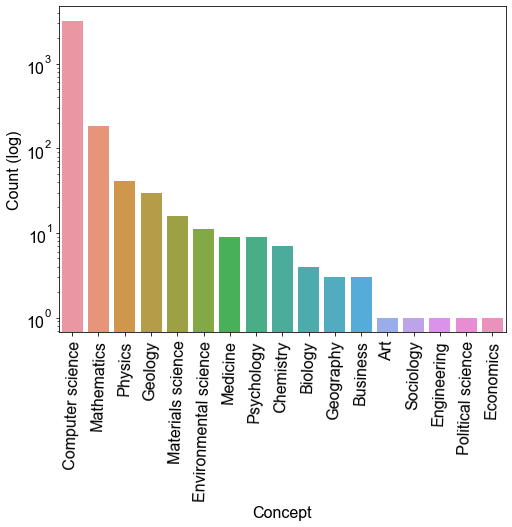

In [30]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = vis_l0_concepts, order = vis_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.ylabel('Count (log)')
plt.yscale('log')
plt.savefig('../results/supp/vis_L0.pdf', bbox_inches = 'tight')

In [31]:
ref_l0 = ref_unique[ref_unique.Level == 0]
ref_l0_concepts = ref_l0.Concept

In [32]:
ref_l0_dic = dict(Counter(ref_l0_concepts))
ref_l0_dic_df = pd.DataFrame(ref_l0_dic.items(), columns = ['concept', 'count'])
ref_l0_dic_df['ratio'] = round(
    ref_l0_dic_df['count'] / len(list(set(ref_unique[ref_key]))),
    3)
ref_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
0,Computer science,32513,0.817
1,Mathematics,5466,0.137
9,Psychology,2575,0.065
7,Physics,1317,0.033
2,Medicine,1056,0.027
5,Biology,785,0.020
6,Geography,630,0.016
13,Geology,537,0.013
11,Sociology,473,0.012
16,Environmental science,488,0.012


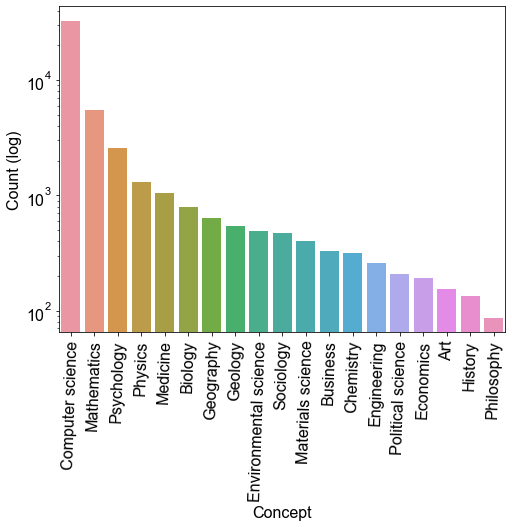

In [33]:
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = ref_l0_concepts, order = ref_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.yscale('log')
plt.ylabel('Count (log)')
plt.savefig('../results/supp/ref_L0.pdf', bbox_inches = 'tight')

In [34]:
cit_l0 = cit_unique[cit_unique.Level == 0]
cit_l0_concepts = cit_l0.Concept

In [35]:
cit_l0_dic = dict(Counter(cit_l0_concepts))
cit_l0_dic_df = pd.DataFrame(cit_l0_dic.items(), columns = ['concept', 'count'])
cit_l0_dic_df['ratio'] = round(
    cit_l0_dic_df['count'] / len(list(set(cit_unique[cit_key]))),
    3)
cit_l0_dic_df.sort_values(by = 'ratio', ascending= False)

,concept,count,ratio
0,Computer science,55008,0.913
17,Mathematics,4673,0.078
1,Biology,1384,0.023
4,Medicine,1252,0.021
7,Geography,1249,0.021
10,Psychology,1251,0.021
6,Physics,782,0.013
3,Business,603,0.010
11,Geology,611,0.010
15,Materials science,519,0.009


In [36]:
# cit_l0_dic = dict(Counter(cit_l0_concepts))
# cit_l0_dic_df = pd.DataFrame(cit_l0_dic.items(), columns = ['concept', 'count'])
# cit_l0_dic_df['ratio'] = round(
#     cit_l0_dic_df['count'] / len(list(set(cit_unique[cit_key])),
#     3)
# cit_l0_dic_df.sort_values(by = 'ratio', ascending= False)

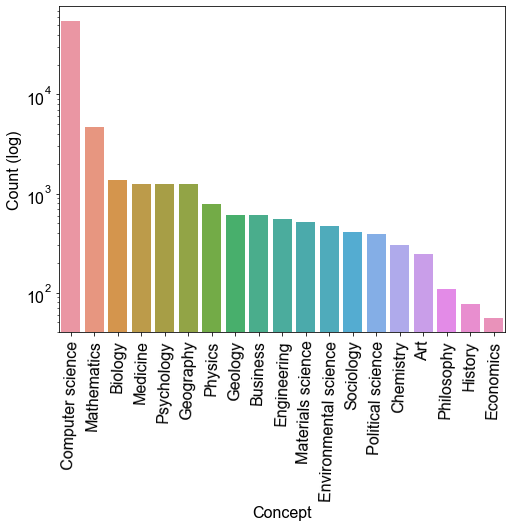

In [37]:
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x = cit_l0_concepts, order = cit_l0_concepts.value_counts().index)
plt.xticks(rotation=88)
plt.ylabel('Count (log)')
plt.yscale('log')
plt.savefig('../results/supp/cit_L0.pdf', bbox_inches = 'tight')

## Popularity trends

I want to see which concepts do not belong to cs.

In [38]:
vis_L2 = vis[vis.Level == 2]
vis_L2[vis_L2.Concept == 'Set (abstract data type)'].head(1)
# it is cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
107,2001,10.1109/VISUAL.2001.964489,Point set surfaces,3,2,Set (abstract data type),https://openalex.org/C177264268,https://www.wikidata.org/wiki/Q1514741,2,0.533244


In [39]:
vis_L2[vis_L2.Concept == 'Context (archaeology)'].head(1)
# not computer science

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
294,2014,10.1109/TVCG.2014.2346248,UpSet: Visualization of Intersecting Sets,14,3,Context (archaeology),https://openalex.org/C2779343474,https://www.wikidata.org/wiki/Q3109175,2,0.638373


In [40]:
vis_L2[vis_L2.Concept == 'Analytics'].head(1)
# cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
708,2011,10.1109/VAST.2011.6102456,SensePlace2: GeoTwitter analytics support for ...,10,4,Analytics,https://openalex.org/C79158427,https://www.wikidata.org/wiki/Q485396,2,0.526905


In [41]:
vis_L2[vis_L2.Concept == 'Pattern recognition (psychology)'].head(1)
# cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
608,1997,10.1109/VISUAL.1997.663875,The contour spectrum,12,10,Pattern recognition (psychology),https://openalex.org/C153180895,https://www.wikidata.org/wiki/Q7148389,2,0.333173


In [42]:
vis_L2[vis_L2.Concept == 'Domain (mathematical analysis)'].head(1)
# math

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
204,2009,10.1109/TVCG.2009.111,A Nested Model for Visualization Design and Va...,16,3,Domain (mathematical analysis),https://openalex.org/C36503486,https://www.wikidata.org/wiki/Q11235244,2,0.555469


In [43]:
vis_L2[vis_L2.Concept == 'Graph'].head(1)
# cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
49,2006,10.1109/TVCG.2006.147,Hierarchical Edge Bundles: Visualization of Ad...,11,6,Graph,https://openalex.org/C132525143,https://www.wikidata.org/wiki/Q141488,2,0.502342


In [44]:
vis_L2[vis_L2.Concept == 'Focus (optics)'].head(1)
# physics

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
139,2007,10.1109/TVCG.2007.70515,Toward a Deeper Understanding of the Role of I...,9,4,Focus (optics),https://openalex.org/C192209626,https://www.wikidata.org/wiki/Q190909,2,0.560184


In [45]:
vis_L3 = vis[vis.Level == 3]
vis_L3[vis_L3.Concept == 'Representation (politics)'].head(1)
# political science

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
3,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,4,Representation (politics),https://openalex.org/C2776359362,https://www.wikidata.org/wiki/Q2145286,3,0.619485


In [46]:
vis_L3[vis_L3.Concept == 'Isosurface'].head(1)
# cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
173,1991,10.1109/VISUAL.1991.175782,The asymptotic decider: resolving the ambiguit...,11,5,Isosurface,https://openalex.org/C45107383,https://www.wikidata.org/wiki/Q1311829,3,0.488049


In [47]:
vis_L3[vis_L3.Concept == 'Graph drawing'].head(1)
# cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
254,2007,10.1109/TVCG.2007.70582,NodeTrix: a Hybrid Visualization of Social Net...,15,14,Graph drawing,https://openalex.org/C112953755,https://www.wikidata.org/wiki/Q739462,3,0.430049


In [48]:
vis_L3[vis_L3.Concept == 'Flow visualization'].head(1)
# not cs

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
2014,2007,10.1109/TVCG.2007.70551,Efficient Computation and Visualization of Coh...,10,7,Flow visualization,https://openalex.org/C83893533,https://www.wikidata.org/wiki/Q5462121,3,0.503467


In [49]:
vis_L3[vis_L3.Concept == 'Volume rendering'].head(1)

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
69,2003,10.1109/VISUAL.2003.1250384,Acceleration techniques for GPU-based volume r...,16,3,Volume rendering,https://openalex.org/C30769735,https://www.wikidata.org/wiki/Q2165951,3,0.765911


### VIS L2 & L3

In [50]:
vis_l2 = vis[vis.Level == 2]
vis_l2_concepts = vis_l2.Concept
vis_l2_dic = dict(Counter(vis_l2_concepts))
vis_l2_dic_df = pd.DataFrame(vis_l2_dic.items(), columns = ['concept', 'count'])
vis_l2_dic_df['ratio'] = round(
    vis_l2_dic_df['count'] / len(list(set(vis.DOI))), 3)
vis_l2_dic_df.sort_values(by = 'ratio', ascending= False).head(30)

,concept,count,ratio
1,Visualization,2266,0.699
34,Rendering (computer graphics),502,0.155
49,Set (abstract data type),382,0.118
151,Process (computing),345,0.106
99,Context (archaeology),261,0.081
185,Analytics,246,0.076
165,Pattern recognition (psychology),212,0.065
77,Domain (mathematical analysis),198,0.061
26,Graph,158,0.049
62,Focus (optics),156,0.048


In [51]:
vis_l3 = vis[vis.Level == 3]
vis_l3_concepts = vis_l3.Concept
vis_l3_dic = dict(Counter(vis_l3_concepts))
vis_l3_dic_df = pd.DataFrame(vis_l3_dic.items(), columns = ['concept', 'count'])
vis_l3_dic_df['ratio'] = round(
    vis_l3_dic_df['count'] / len(list(set(vis.DOI))), 3)
vis_l3_dic_df.sort_values(by = 'ratio', ascending= False).head(10)

,concept,count,ratio
1,Data visualization,1438,0.444
18,Visual analytics,486,0.150
2,Information visualization,388,0.120
5,Volume rendering,273,0.084
0,Representation (politics),219,0.068
24,Interactive visualization,141,0.044
32,Scientific visualization,122,0.038
15,Isosurface,104,0.032
22,Graph drawing,84,0.026
96,Flow visualization,77,0.024


## Heat map

In [52]:
cooccur_orig = pd.read_csv('../data/plots/co_occurrance/aggregated_cooccurance_df.csv')
sources = cooccur_orig['source']
targets = cooccur_orig['target']
values = cooccur_orig['value']
levels = cooccur_orig['level']
df2 = pd.DataFrame({
    'source': targets,
    'target': sources,
    'value': values,
    'level': levels
})
cooccur_orig = cooccur_orig.append(df2).reset_index(drop=True)

### Co-occur in Level 0

In [53]:
cooccur = cooccur_orig[(cooccur_orig.level == 0) & (cooccur_orig.value > 1)]
cooccur.head()

,source,target,value,level
0,Mathematics,Computer science,160,0
1,Computer science,Physics,28,0
2,Geology,Computer science,23,0
3,Computer science,Materials science,15,0
4,Environmental science,Computer science,9,0


In [54]:
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)

In [55]:
# df_wide = df_wide.replace(
#     ['Artificial intelligence', 'Computer graphics (images)', 'Data science', 'Human-computer interaction', 'Machine learning'],
#     ['AI', 'Computer Graphics', 'DS', 'HCI', 'ML']
# )

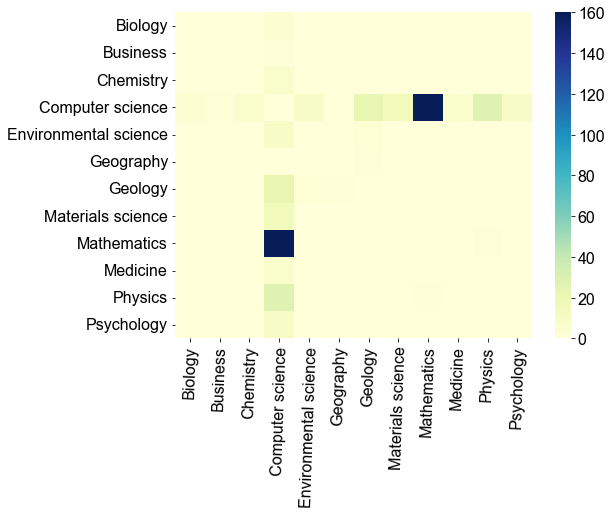

In [56]:
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
# g.set_title('A', loc = 'left')
plt.savefig('../results/supp/co_occur_L0.pdf', bbox_inches = 'tight')
# plt.savefig('../results/figures/heat.png', bbox_inches = 'tight')

### L1

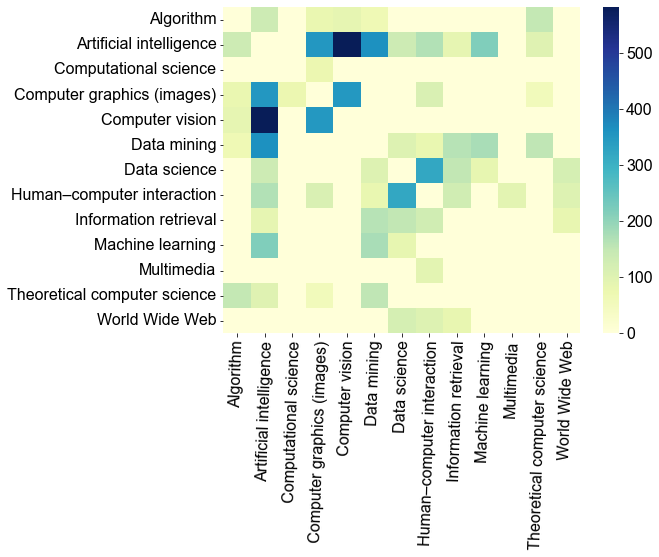

In [57]:
cooccur = cooccur_orig[(cooccur_orig.level == 1) & (cooccur_orig.value > 50)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L1.pdf', bbox_inches = 'tight')

###  L2

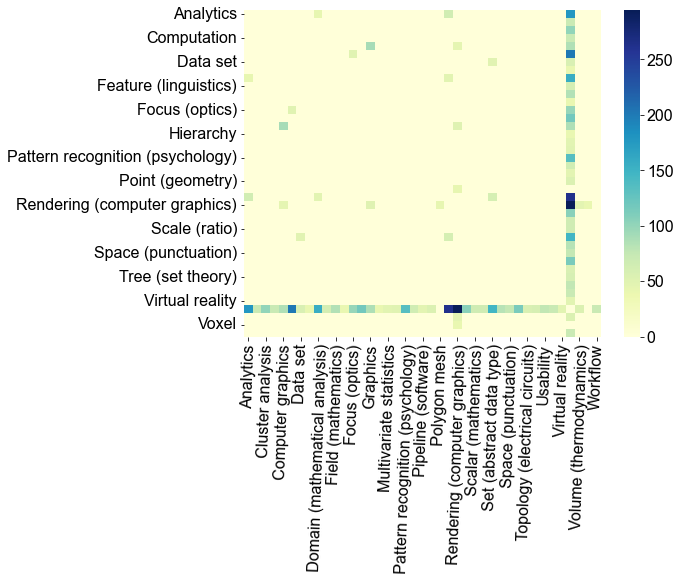

In [58]:
cooccur = cooccur_orig[(cooccur_orig.level == 2) & (cooccur_orig.value > 40)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L2.pdf', bbox_inches = 'tight')

### L3

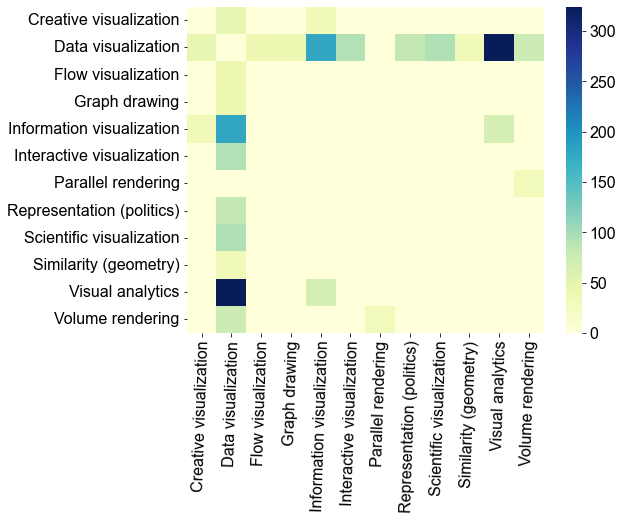

In [59]:
cooccur = cooccur_orig[(cooccur_orig.level == 3) & (cooccur_orig.value > 30)]
cooccur.head()
df_wide = cooccur.pivot_table( index='source', columns='target', values='value').fillna(0)
fig = plt.figure(figsize=(8, 6))
g = sns.heatmap(df_wide, cmap="YlGnBu")
plt.xticks(rotation=88)
g.set_xlabel('')
g.set_ylabel('')
plt.savefig('../results/supp/co_occur_L3.pdf', bbox_inches = 'tight')

## L1 concept evolution (Stack area chart)

To show the evolution of top ten (and 'Other') Level 1 Concepts of VIS publications over the past 32 years. 

In [60]:
df = vis
LEVEL = 1
level1_df = df[df.Level == LEVEL]
level1_df.head()

,Year,DOI,Title,Number of Concepts,Index of Concept,Concept,Concept ID,Wikidata,Level,Score
8,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,9,Programming language,https://openalex.org/C199360897,https://www.wikidata.org/wiki/Q9143,1,0.489120
9,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,10,Information retrieval,https://openalex.org/C23123220,https://www.wikidata.org/wiki/Q816826,1,0.434999
12,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,13,Theoretical computer science,https://openalex.org/C80444323,https://www.wikidata.org/wiki/Q2878974,1,0.391520
13,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,14,Data mining,https://openalex.org/C124101348,https://www.wikidata.org/wiki/Q172491,1,0.336673
14,2011,10.1109/TVCG.2011.185,D³ Data-Driven Documents,15,15,Human–computer interaction,https://openalex.org/C107457646,https://www.wikidata.org/wiki/Q207434,1,0.325311


In [61]:
# top ten L1 concepts
dic = dict(Counter(level1_df.Concept).most_common(10))
top_ten = list(dic.keys())
top_ten

['Artificial intelligence',
 'Data mining',
 'Human–computer interaction',
 'Computer graphics (images)',
 'Data science',
 'Computer vision',
 'Algorithm',
 'Theoretical computer science',
 'Information retrieval',
 'Machine learning']

In [62]:
# timeseries and rename those concepts not in top ten as "Other"
tuples = []
for group in level1_df.groupby('Year'):
    year = group[0]
    group[1]['Concept New'] = group[1].Concept.apply(
        lambda x: x if x in top_ten else 'Other'
    )
    for concept_group in group[1].groupby('Concept New'):
        concept = concept_group[0]
        count = concept_group[1].shape[0]
        tuples.append((year, concept, count))

In [63]:
# prepare for stack area chart
dff = pd.DataFrame(list(tuples), columns = ['year', 'concept', 'count'])
dff['Year'] = pd.to_datetime(dff['year'], format='%Y')
dff.replace({
    'Artificial intelligence': 'AI',
    'Human–computer interaction': 'HCI',
    'Computer graphics (images)': 'Computer grafics'
    
}, inplace=True)
dff.head()

,year,concept,count,Year
0,1990,Algorithm,13,1990-01-01
1,1990,AI,14,1990-01-01
2,1990,Computer grafics,28,1990-01-01
3,1990,Computer vision,14,1990-01-01
4,1990,Data mining,2,1990-01-01


In [64]:
alt.Chart(dff).mark_area().encode(
    x="Year:T",
    y=alt.Y(
        'count:Q',
        title = 'Number of publications',
    ),
    color=alt.Color(
        "concept:N",
        title = 'Fields of Study (L1)'
    )
).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_legend(
    titleFontSize=16,
    labelFontSize=16
).configure_range(
    category={'scheme': 'paired'}
).properties(
    width = 400
)

alt.Chart(...)